In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
data = pd.read_csv('silver.csv', parse_dates=['Date'], index_col='Date')

In [5]:
monthly_usd = data['USD'].resample('MS').mean()

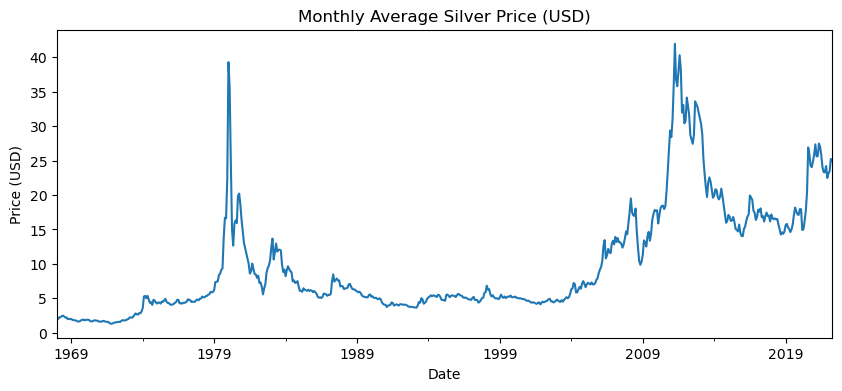

In [6]:
monthly_usd.plot(title='Monthly Average Silver Price (USD)', figsize=(10, 4))
plt.ylabel('Price (USD)')
plt.show()

In [7]:
scaler = MinMaxScaler()
scaled = pd.Series(
    scaler.fit_transform(monthly_usd.values.reshape(-1,1)).flatten(),
    index=monthly_usd.index
)

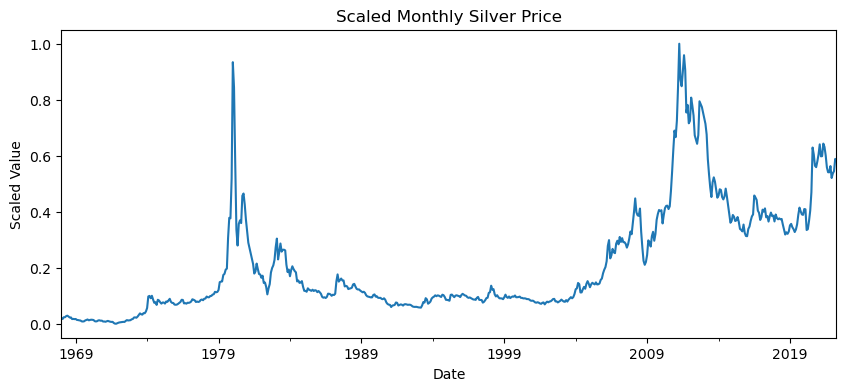

In [8]:
scaled.plot(title='Scaled Monthly Silver Price', figsize=(10, 4))
plt.ylabel('Scaled Value')
plt.show()

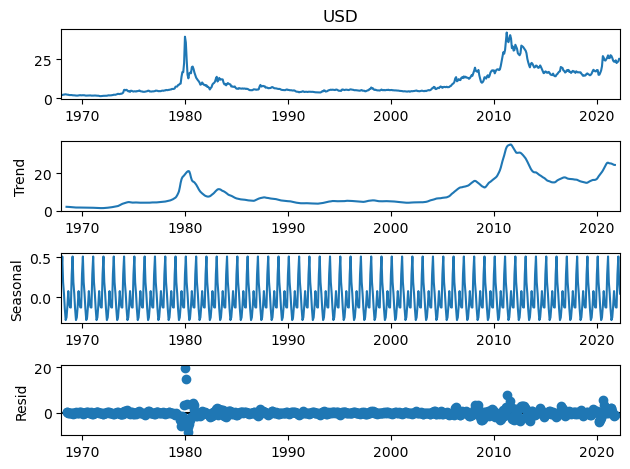

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(monthly_usd, model='additive', period=12)
decomp.plot()
plt.show()

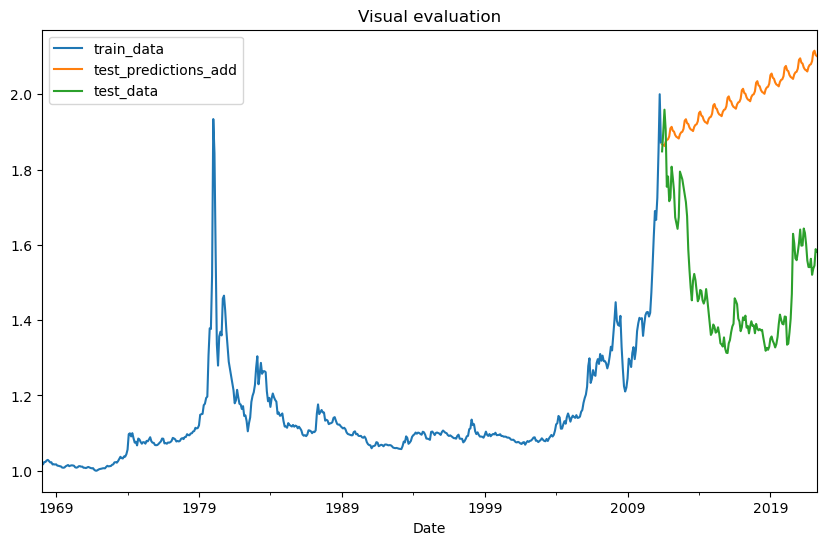

Test RMSE: 0.5333
Std dev of scaled_data: 0.1966
Mean of scaled_data:    1.2106


In [10]:
scaler = MinMaxScaler()
scaled_data = pd.Series(
    scaler.fit_transform(monthly_usd.values.reshape(-1,1)).flatten(),
    index=monthly_usd.index
)

scaled_data = scaled_data + 1  

split = int(len(scaled_data) * 0.8)
train_data = scaled_data[:split]
test_data  = scaled_data[split:]

model_add = ExponentialSmoothing(
    train_data, 
    trend='add', 
    seasonal='mul', 
    seasonal_periods=12
).fit()

test_predictions_add = model_add.forecast(steps=len(test_data))

ax = train_data.plot(label='train_data', figsize=(10, 6))
test_predictions_add.plot(ax=ax, label='test_predictions_add')
test_data.plot(ax=ax, label='test_data')
ax.legend()
ax.set_title('Visual evaluation')
plt.show()

rmse = np.sqrt(mean_squared_error(test_data, test_predictions_add))
print(f"Test RMSE: {rmse:.4f}")

print(f"Std dev of scaled_data: {scaled_data.std():.4f}")
print(f"Mean of scaled_data:    {scaled_data.mean():.4f}")

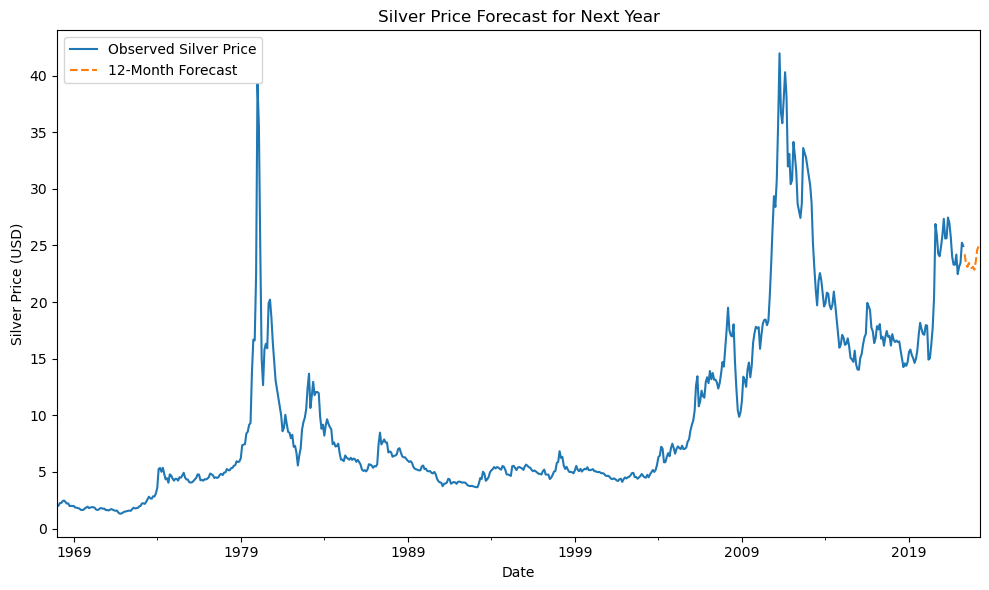

In [11]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data = pd.read_csv('silver.csv', parse_dates=['Date'], index_col='Date')

data_monthly = data['USD'].resample('MS').mean()

final_model = ExponentialSmoothing(
    data_monthly, 
    trend='add', 
    seasonal='mul', 
    seasonal_periods=12
).fit()

forecast_steps = 12
final_predictions = final_model.forecast(steps=forecast_steps)

ax = data_monthly.plot(label='Observed Silver Price', figsize=(10, 6))
final_predictions.plot(ax=ax, label='12‑Month Forecast', linestyle='--')

ax.set_xlabel('Date')
ax.set_ylabel('Silver Price (USD)')
ax.set_title('Silver Price Forecast for Next Year')
ax.legend()
plt.tight_layout()
plt.show()
